# Using LSTM for prediction of future weather of cities in Python 

Dataset Link: https://www.kaggle.com/datasets/dipakdeshmukh/weather-data-of-punemaharashtraindia2008-2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [9]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)

print(df.head())
print(df.info())


         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None


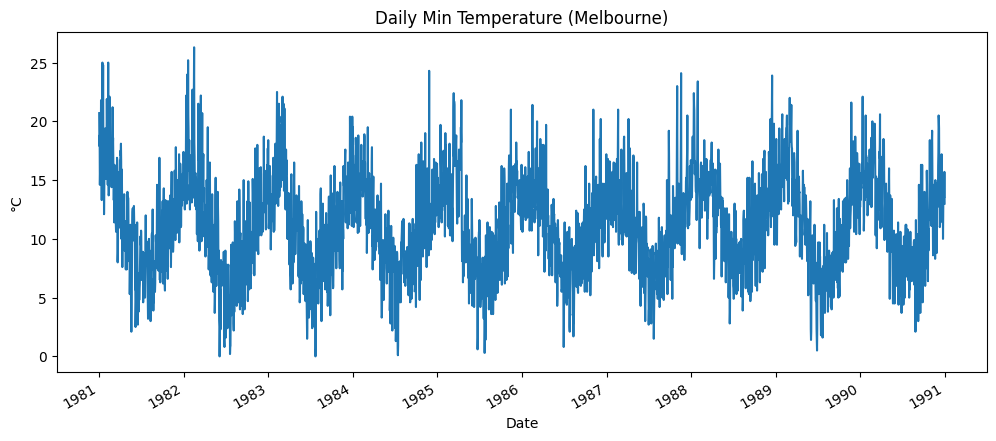

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.rename(columns={'Temp': 'Temperature'}, inplace=True)

# Visualize
df['Temperature'].plot(figsize=(12, 5), title='Daily Min Temperature (Melbourne)', ylabel='°C')
plt.show()


In [11]:
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(df[['Temperature']])


In [12]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_temp, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, y_train.shape)


(2896, 30, 1) (2896, 1)


In [13]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
91/91 [==============================] - 2s 9ms/step - loss: 0.0339 - val_loss: 0.0094
Epoch 2/20
91/91 [==============================] - 1s 7ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 3/20
91/91 [==============================] - 1s 7ms/step - loss: 0.0110 - val_loss: 0.0093
Epoch 4/20
91/91 [==============================] - 1s 7ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 5/20
91/91 [==============================] - 1s 8ms/step - loss: 0.0106 - val_loss: 0.0090
Epoch 6/20
91/91 [==============================] - 1s 7ms/step - loss: 0.0104 - val_loss: 0.0086
Epoch 7/20
91/91 [==============================] - 1s 8ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 8/20
91/91 [==============================] - 1s 9ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 9/20
91/91 [==============================] - 1s 7ms/step - loss: 0.0099 - val_loss: 0.0077
Epoch 10/20
91/91 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0084
Epoch 11/20
91/91 [

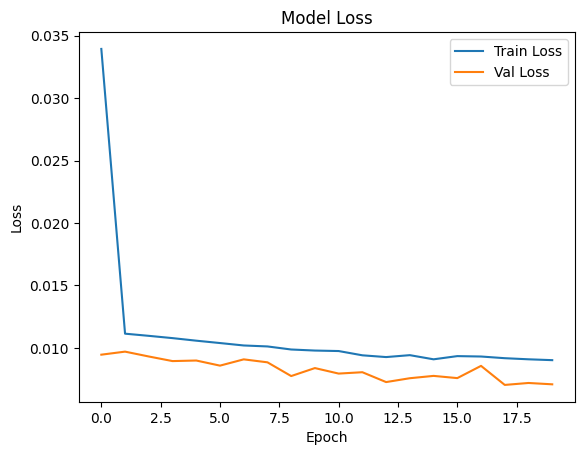

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [16]:
predicted = model.predict(X_test)
predicted_temp = scaler.inverse_transform(predicted)
actual_temp = scaler.inverse_transform(y_test.reshape(-1, 1))


23/23 [==============================] - 0s 2ms/step


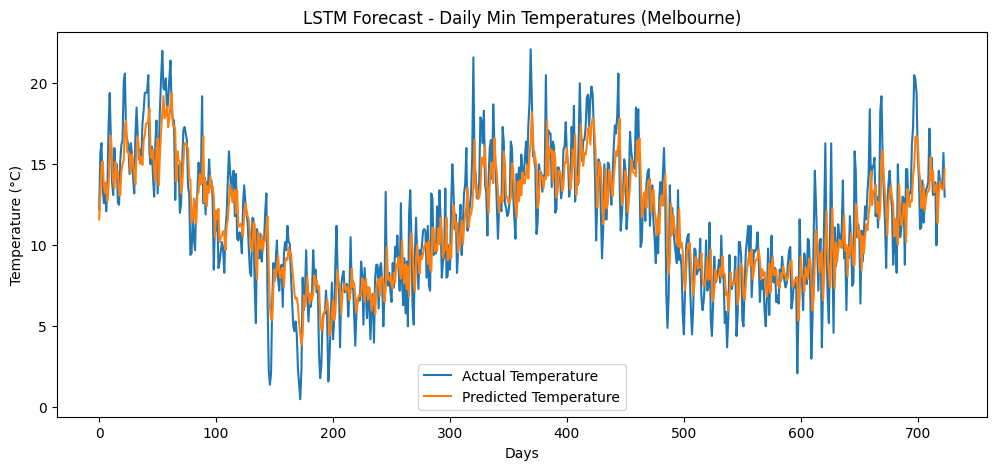

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(actual_temp, label='Actual Temperature')
plt.plot(predicted_temp, label='Predicted Temperature')
plt.title('LSTM Forecast - Daily Min Temperatures (Melbourne)')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(actual_temp, predicted_temp)
mse = mean_squared_error(actual_temp, predicted_temp)
rmse = math.sqrt(mse)
r2 = r2_score(actual_temp, predicted_temp)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1.7317
Mean Squared Error (MSE): 4.8925
Root Mean Squared Error (RMSE): 2.2119
R-squared (R²): 0.7089
